In [1]:
import numpy as np
import matplotlib.pyplot as plt
from planes import RandomProjectionForestOld
from projections import RandomProjectionForest
from iforest import IsolationForest
from sklearn import datasets

%matplotlib inline

In [2]:
def run_simuls(X, X_anon, model, title='', n_estimators=100, score_at=97.5):
    X_all = np.row_stack([X, X_anon])
    np.random.shuffle(X_all)

    # X[is_anomaly] = X_anon
    
    # Run the simulations on all data first
    clf_ifo_all = model(n_estimators=n_estimators, method='iforest').fit(X_all)
    clf_rcf_all = model(n_estimators=n_estimators, method='rcf').fit(X_all)
    
    # Rerun while holding out anomalous points during fitting
    clf_ifo_hld = model(n_estimators=n_estimators, method='iforest').fit(X)
    clf_rcf_hld = model(n_estimators=n_estimators, method='rcf').fit(X)
    
    
    y_all_pred_ifo = clf_ifo_all.predict(X_all, score_at=score_at)
    y_all_pred_rcf = clf_rcf_all.predict(X_all, score_at=score_at)
    
    y_hld_pred_ifo = clf_ifo_hld.predict(X_all, score_at=SCORE_AT)
    y_hld_pred_rcf = clf_rcf_hld.predict(X_all, score_at=SCORE_AT)
    
    name_vals = [
        ('Non-proportional Weighting - All',  y_all_pred_ifo, clf_ifo_all), 
        ('Proportional Weighting - All',      y_all_pred_rcf, clf_rcf_all), 
        ('Non-proportional Weighting - Held', y_hld_pred_ifo, clf_ifo_hld),
        ('Proportional Weighting - Held',     y_hld_pred_rcf, clf_rcf_hld),
    ]
    
    xlim = [np.min(X_all[:, 0]) - 1.0, np.max(X_all[:, 0]) + 1.0]
    ylim = [np.min(X_all[:, 1]) - 1.0, np.max(X_all[:, 1]) + 1.0]
    
    xx, yy = np.meshgrid(np.linspace(int(np.min(X[:, 0]))-5.0, int(np.max(X[:, 0]))+5.0, 100), 
                         np.linspace(int(np.min(X[:, 1]))-5.0, int(np.max(X[:, 1]))+5.0, 100))
    
    fig = plt.figure(figsize=(16, 16))
    
    for i, v in enumerate(name_vals):
        sub_title, y, clf = v
        subplt = int('22'+str(i+1))
        plt.subplot(subplt)
        plt.title(sub_title)
        
        X_non_pred = X_all[y == 0]
        X_ano_pred = X_all[y == 1]

        Z = 1 - clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

        plt.scatter(X_non_pred[:, 0], X_non_pred[:, 1], c='b', alpha=0.2, marker='o')
        plt.scatter(X_ano_pred[:, 0], X_ano_pred[:, 1], c='r', alpha=0.5, marker='x')
        
        plt.xlim(xlim)
        plt.ylim(ylim)
    
    plt.suptitle(title)
    plt.show()

In [28]:
# Parameters for each classifier
N_ESTIMATORS = 100
SCORE_AT = 95.0
n = 1000
contamination = 0.025
n_anomalies = int(n * contamination)
p = 2

mean = np.array([0, 0])

# cov = np.array([
#     [  3.40, -2.75, -2.00],
#     [ -2.75,  5.50,  1.50],
#     [ -2.00,  1.50,  1.25]
# ])

# The desired covariance matrix.
cov = np.array([
    [1.0, -1.175],
    [-1.0, 1.250]
])

cov_2 = np.array([
    [1.0, 1.175],
    [1.0, 1.250]
])

cov_anon = np.array([
    [ 0.10, 0.0],
    [ 0.0, 0.10]
])

offset = 50

mean_anon = [ -2.5,  -2.5]
mean_1 =    [ -1.0,   0.0]
mean_2 =    [  1.0,   0.0]

is_anomaly = np.random.choice(n, size=n_anomalies, replace=False)


# X, y = datasets.make_moons(n_samples=n, noise=0.02)
# X = offset * X

X = np.random.multivariate_normal(mean=mean_1,  cov=cov, size=(int(n/2),))
X = np.row_stack([X, np.random.multivariate_normal(mean=mean_2, cov=cov_2, size=(int(n/2),))])
X_anon = np.random.multivariate_normal(mean=mean_anon, cov=cov_anon, size=(is_anomaly.shape[0]))

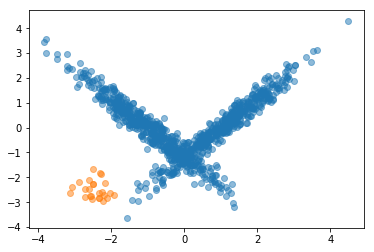

In [29]:
# plt.scatter(X_non[:, 0], X_non[:, 1], c='b', alpha=0.5, marker='o')
# plt.scatter(X_ano[:, 0], X_ano[:, 1], c='r', alpha=0.5, marker='x')
# plt.scatter(X_non[:, 0], X_non[:, 1], alpha=0.5)
# plt.scatter(X_anon[:, 0], X_anon[:, 1], alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_anon[:, 0], X_anon[:, 1], alpha=0.5)


plt.show()

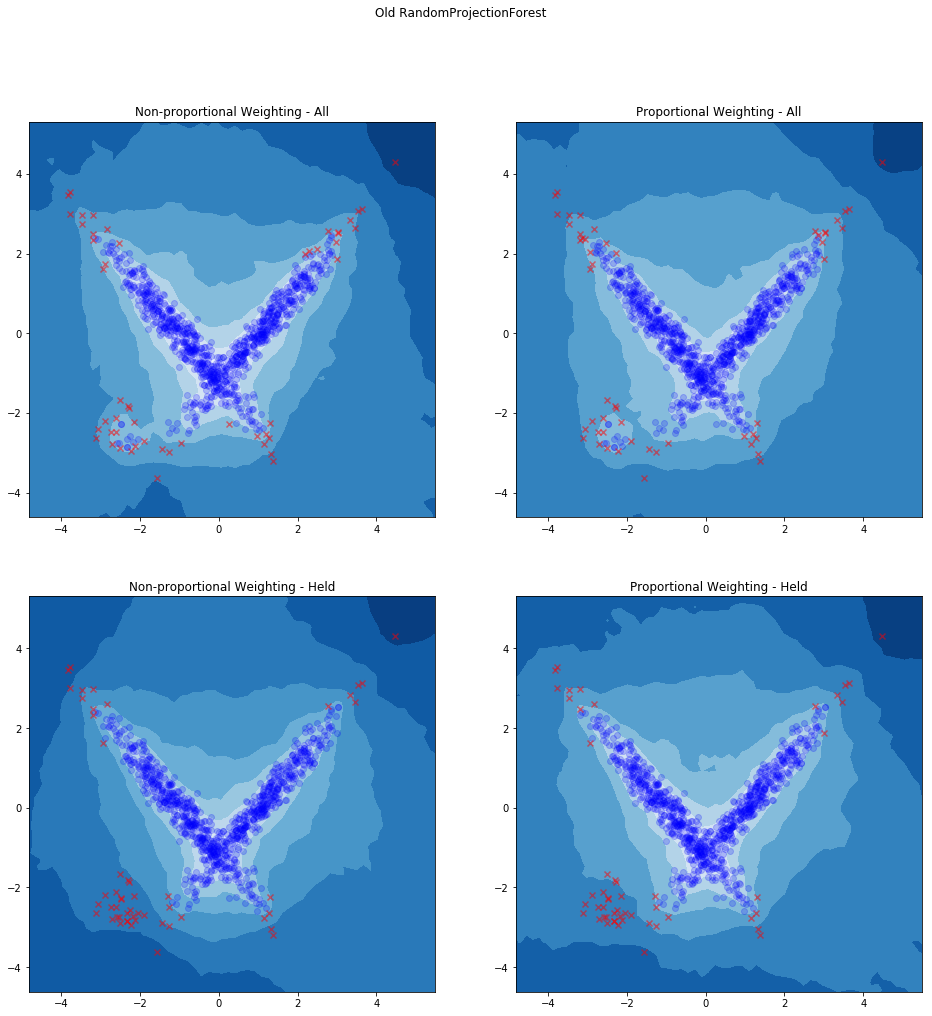

In [30]:
run_simuls(
    X=X, 
    X_anon=X_anon, 
    model=RandomProjectionForestOld, 
    title='Old RandomProjectionForest',
    n_estimators=N_ESTIMATORS,
    score_at=SCORE_AT
)

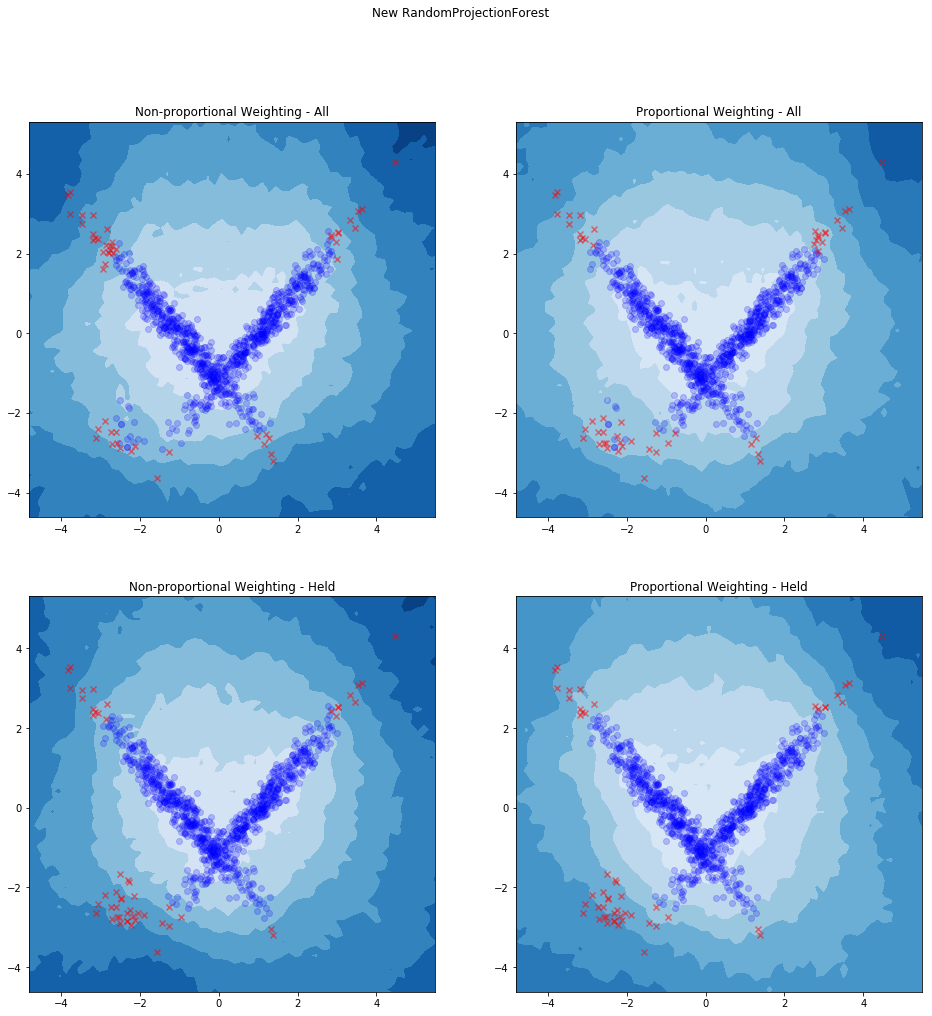

In [31]:
run_simuls(
    X=X, 
    X_anon=X_anon, 
    model=RandomProjectionForest, 
    title='New RandomProjectionForest',
    n_estimators=N_ESTIMATORS,
    score_at=SCORE_AT
)

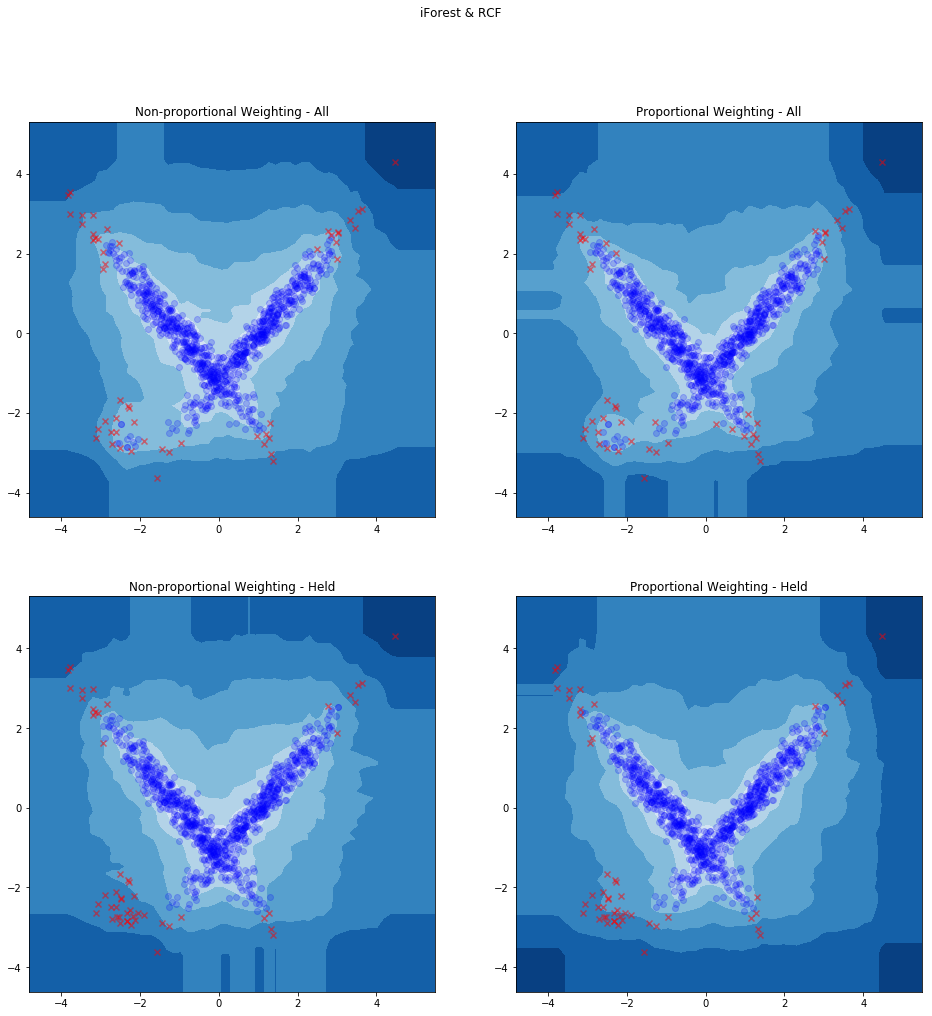

In [32]:
run_simuls(
    X=X, 
    X_anon=X_anon, 
    model=IsolationForest, 
    title='iForest & RCF',
    n_estimators=N_ESTIMATORS,
    score_at=SCORE_AT
)